<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/06_tree_multi_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 의사 결정나무 다중분류
- iris dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.데이터 준비

In [ ]:
# !wget https://archive.ics.uci.edu/dataset/53/iris

In [ ]:
!unzip iris.zip

Archive:  iris.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

```
Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class:
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
```

In [ ]:
iris = pd.read_csv('iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris.shape

(150, 5)

In [ ]:
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [ ]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### 2.테스트 데이터 분리

In [ ]:
X = df.drop('class', axis=1)
X.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]>

In [ ]:
y = df['class']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
y_train.value_counts()

Iris-versicolor    41
Iris-setosa        40
Iris-virginica     39
Name: class, dtype: int64

### 3.전처리 안함
- 트리 알고리즘이므로 전처리 생략하고 학습 진행

### 4.학습

In [ ]:
columns = X_train.columns

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)

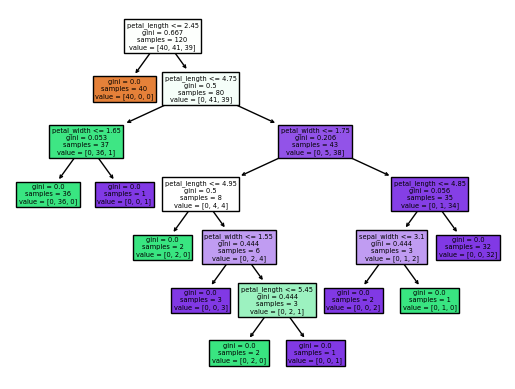

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf, feature_names=X_train.columns, filled=True)
plt.show()

### 5.평가

In [ ]:
X_test = X_test.values
y_test = y_test.values

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#### 평가지표

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y_test, y_pred):
  print(f'accuracy : {accuracy_score(y_test, y_pred)}')
  print(f'recall : {recall_score(y_test, y_pred, average="macro")}')
  print(f'precision : {precision_score(y_test, y_pred, average="macro")}')
  print(f'f1 : {f1_score(y_test, y_pred, average="macro")}')

In [ ]:
print_metrics(y_test, y_pred)

accuracy : 1.0
recall : 1.0
precision : 1.0
f1 : 1.0


#### 6.튜닝

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf = clf.fit(X_train, y_train)

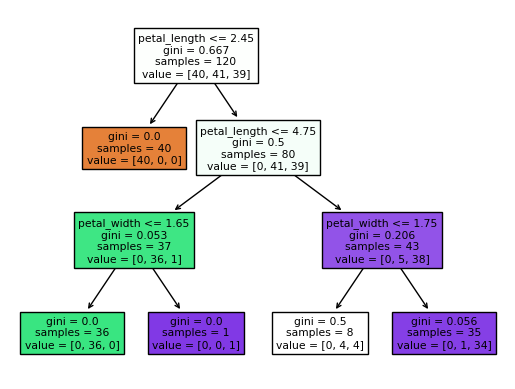

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf, feature_names=columns, filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

accuracy : 0.9666666666666667
recall : 0.9629629629629629
precision : 0.9722222222222222
f1 : 0.9658994032395567


### END